In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
## 1.  Adding the column names to both datasets while reading them:

## The "customer details" file is read and is given the column headings

table1=pd.read_csv('.\projects\customer_details.csv')
table1.columns=["Customer_id","Gender","Age","Driving_license_present","Region_Code","Previously_insured","Vehicle_age","Vehicle_damage"]
#To look at the customer details table
table1

,Customer_id,Gender,Age,Driving_license_present,Region_Code,Previously_insured,Vehicle_age,Vehicle_damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [5]:
# Table2
table2=pd.read_csv('.\projects\customer_policy_details.csv')
table2.columns=["Customer_id", "Annual_premium", "Sales_Channel_Code", "Vintage", "Response" ]
table2


,Customer_id,Annual_premium,Sales_Channel_Code,Vintage,Response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


## 2. Checking and Cleaning Data Quality:

In [27]:
 #===============================table1============================================================
    # Generating a summary of count of all the null values column wise for table 1

table1.isnull().sum()




Customer_id                0
Gender                     0
Age                        0
Driving_license_present    0
Region_Code                0
Previously_insured         0
Vehicle_age                0
Vehicle_damage             0
dtype: int64

In [29]:
# Drop Null values for customer_id because central tendencies for id’s is not feasible

table1 = table1[~table1.Customer_id.isnull()].copy()


table1.isnull().sum()


table1

,Customer_id,Gender,Age,Driving_license_present,Region_Code,Previously_insured,Vehicle_age,Vehicle_damage
0,1.0,MALE,44.0,1.0,28.0,0.0,> 2 Years,YES
1,2.0,MALE,76.0,1.0,3.0,0.0,1-2 Year,NO
2,3.0,MALE,47.0,1.0,28.0,0.0,> 2 Years,YES
3,4.0,MALE,21.0,1.0,11.0,1.0,< 1 Year,NO
4,5.0,FEMALE,29.0,1.0,41.0,1.0,< 1 Year,NO
...,...,...,...,...,...,...,...,...
381104,381105.0,MALE,74.0,1.0,26.0,1.0,1-2 Year,NO
381105,381106.0,MALE,30.0,1.0,37.0,1.0,< 1 Year,NO
381106,381107.0,MALE,21.0,1.0,30.0,1.0,< 1 Year,NO
381107,381108.0,FEMALE,68.0,1.0,14.0,0.0,> 2 Years,YES


In [16]:
# Replace all null values for numeric columns by mean for table 1

#numeric data
age_mean = table1['Age'].mean()
table1['Age'].fillna(value=age_mean,inplace=True)

region_mean = table1['Region_Code'].mean()
table1['Region_Code'].fillna(value=region_mean,inplace=True)

In [35]:
# Replace all null values for Categorical value by mode for table 1

#categorical data

gender_mode=table1.Gender.mode()[0]
table1['Gender'].fillna(gender_mode,inplace=True)

driving_license_present_mode=table1.Driving_license_present.mode()[0]
table1['Driving_license_present'].fillna(driving_license_present_mode,inplace=True)

previously_insured_mode=table1.Previously_insured.mode()[0]
table1['Previously_insured'].fillna(previously_insured_mode,inplace=True)

vehicle_damage_mode=table1.Vehicle_damage.mode()[0]
table1['Vehicle_damage'].fillna(vehicle_damage_mode,inplace=True)

vehicle_age_mode=table1.Vehicle_age.mode()[0]
table1['Vehicle_age'].fillna(vehicle_age_mode,inplace=True)


table1.isnull().sum()



table1.describe()


,Customer_id,Age,Driving_license_present,Region_Code,Previously_insured
count,380723.000000,380723.000000,380723.000000,380723.000000,380723.000000
mean,190548.776244,38.822788,0.997870,26.389436,0.457800
std,110016.805160,15.504826,0.046105,13.223671,0.498217
min,1.000000,20.000000,0.000000,0.000000,0.000000
25%,95269.500000,25.000000,1.000000,15.000000,0.000000
50%,190543.000000,36.000000,1.000000,28.000000,0.000000
75%,285822.500000,49.000000,1.000000,35.000000,1.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000


## ii. Outliers

In [37]:
#==========================================outliers of table 1=====================================
# Age Outliers detection

x= table1.describe()["Age"]

IQR_age= x["75%"]-x["25%"]

table1[table1["Age"]<x["25%"]-1.5*IQR_age]

table1[table1["Age"]>x["75%"]+1.5*IQR_age]

# Region Code Outlier detection

y= table1.describe()["Region_Code"]

IQR_rc= y["75%"]-y["25%"]

table1[table1["Region_Code"]<x["25%"]-1.5*IQR_rc]

table1[table1["Region_Code"]>x["75%"]+1.5*IQR_rc]
table1.describe()

,Customer_id,Age,Driving_license_present,Region_Code,Previously_insured
count,380723.000000,380723.000000,380723.000000,380723.000000,380723.000000
mean,190548.776244,38.822788,0.997870,26.389436,0.457800
std,110016.805160,15.504826,0.046105,13.223671,0.498217
min,1.000000,20.000000,0.000000,0.000000,0.000000
25%,95269.500000,25.000000,1.000000,15.000000,0.000000
50%,190543.000000,36.000000,1.000000,28.000000,0.000000
75%,285822.500000,49.000000,1.000000,35.000000,1.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000


In [12]:
# Outlier detection of table2


# Annual Premium outlier detection 

x= table2.describe()["Annual_premium"]

IQR_ap= x["75%"]-x["25%"]

table2[table2["Annual_premium"]<x["25%"]-1.5*IQR_ap]

table2[table2["Annual_premium"]>x["75%"]+1.5*IQR_ap]

mean = table2["Annual_premium"].mean()
upper_outliers = table2["Annual_premium"]>x["75%"]+1.5*IQR_ap

mean

table2.loc[upper_outliers,"Annual_premium"]=np.nan
table2["Annual_premium"].fillna(mean,inplace=True)

table2[table2["Annual_premium"]>x["75%"]+1.5*IQR_ap]
# Sales Channel Code Outlier detection

x= table2.describe()["Sales_Channel_Code"]

IQR_scc= x["75%"]-x["25%"]

table2[table2["Sales_Channel_Code"]<x["25%"]-1.5*IQR_scc]

table2[table2["Sales_Channel_Code"]>x["75%"]+1.5*IQR_scc]




,Customer_id,Annual_premium,Sales_Channel_Code,Vintage,Response


In [17]:
# Vintage Outlier Detection

x= table2.describe()["Vintage"]

IQR_v= x["75%"]-x["25%"]

table2[table2["Vintage"]<x["25%"]-1.5*IQR_v]


table2[table2["Vintage"]>x["75%"]+1.5*IQR_v]


,Customer_id,Annual_premium,Sales_Channel_Code,Vintage,Response


In [15]:
# iii. Removing White spaces

table1.head()


table1['Vehicle_age'].str.replace(' ','')
table1['Gender'].str.replace(' ','')
table1['Vehicle_damage'].replace(' ','')
table1

,Customer_id,Gender,Age,Driving_license_present,Region_Code,Previously_insured,Vehicle_age,Vehicle_damage
0,1.0,MALE,44.0,1.0,28.0,0.0,> 2 Years,YES
1,2.0,MALE,76.0,1.0,3.0,0.0,1-2 Year,NO
2,3.0,MALE,47.0,1.0,28.0,0.0,> 2 Years,YES
3,4.0,MALE,21.0,1.0,11.0,1.0,< 1 Year,NO
4,5.0,FEMALE,29.0,1.0,41.0,1.0,< 1 Year,NO
...,...,...,...,...,...,...,...,...
381104,381105.0,MALE,74.0,1.0,26.0,1.0,1-2 Year,NO
381105,381106.0,MALE,30.0,1.0,37.0,1.0,< 1 Year,NO
381106,381107.0,MALE,21.0,1.0,30.0,1.0,< 1 Year,NO
381107,381108.0,FEMALE,68.0,1.0,14.0,0.0,> 2 Years,YES


In [46]:
# iv. case correction. Convert string values to uppercase

table1["Gender"]=table1["Gender"].str.upper()
table1["Vehicle_damage"]=table1["Vehicle_damage"].str.upper()

table1.sample(10)



KeyError: 'Gender'

In [44]:
# v. Convert nominal data (categorical) into dummies 

# for future modeling use if required 
 

table1_d=pd.get_dummies(table1, columns=['Gender','Vehicle_damage','Driving_license_present','Previously_insured','Vehicle_age'])


table2_d=pd.get_dummies(table2,columns=['Response'])


In [21]:
# vi. Droping Duplicates (duplicated rows)

table1.drop_duplicates(inplace=True)
table1_d.drop_duplicates(inplace=True) #table1 with the dummy columns


table2.drop_duplicates(inplace=True)
table2_d.drop_duplicates(inplace=True) #table2 with the dummy columns

In [22]:
# 3. Create a Master table for future use. Join the customer table and customer_policy table 
# to get a master table using customer_id in both tables.


table_merge=pd.merge(table1,table2,on='Customer_id')


table_merge_d=pd.merge(table1_d,table2_d,on="Customer_id") #this is a merged table for the dummies table


table_merge


table_merge_d.describe()


table_merge.describe()



,Customer_id,Age,Driving_license_present,Region_Code,Previously_insured,Annual_premium,Sales_Channel_Code,Vintage,Response
count,380336.000000,380336.000000,380336.000000,380336.000000,380336.000000,380336.000000,379937.000000,379948.000000,379976.000000
mean,190541.253954,38.822339,0.997868,26.389690,0.457811,29080.086059,112.037617,154.353306,0.122539
std,110013.789585,15.505135,0.046128,13.223789,0.498218,14293.091302,54.205393,83.672832,0.327908
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95267.750000,25.000000,1.000000,15.000000,0.000000,24416.000000,29.000000,82.000000,0.000000
50%,190524.500000,36.000000,1.000000,28.000000,0.000000,30766.000000,133.000000,154.000000,0.000000
75%,285809.250000,49.000000,1.000000,35.000000,1.000000,38094.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,59223.000000,163.000000,299.000000,1.000000


In [23]:
# 4. Gaining insights from the data for future growth of the insurance company

# The following information are collected:

# i. Gender wise average annual premium: To find the gender who have taken the most policies from the company so we can 
# find ways to further increase the number

table_merge.groupby('Gender')['Annual_premium'].mean()

Gender
FEMALE    29056.412585
MALE      29100.152350
Name: Annual_premium, dtype: float64

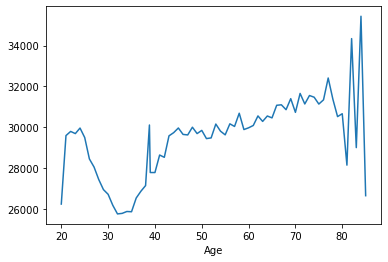

Age
20.0    26226.800369
21.0    29586.677909
22.0    29789.750452
23.0    29683.449131
24.0    29955.547988
            ...     
81.0    28136.097718
82.0    34344.036953
83.0    28995.804558
84.0    35440.818182
85.0    26637.427298
Name: Annual_premium, Length: 67, dtype: float64

In [24]:

# # ii. Age wise average annual premium: The result is plotted as a graph to get visualized result of the age distribution
# of the policy holder's average annual premium 

age_plot= table_merge.groupby('Age')['Annual_premium'].mean()
age_plot.plot()
plt.show()


age_plot  #age wise average annual premium

In [47]:

#iii. Finding if the data is balanced between the two genders

print("Proportion of Males in data: ", table_merge_d[table_merge_d["Gender_MALE"]==1].shape[0]/table_merge_d.shape[0]*100)


print("Proportion FeMales in data:",table_merge_d[table_merge_d["Gender_FEMALE"]==1].shape[0]/table_merge_d.shape[0]*100)



Proportion of Males in data:  54.123459257077954
Proportion FeMales in data: 45.87654074292205


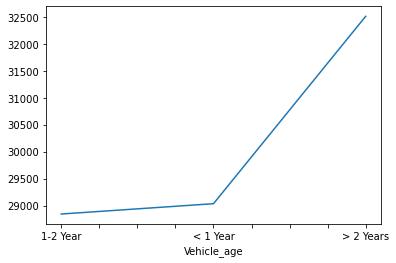

There is no relationship


In [26]:
# # iv. Vehicle age wise average annual premium.

table_merge.groupby('Vehicle_age')['Annual_premium'].mean()


vehicle_age_plot= table_merge.groupby('Vehicle_age')['Annual_premium'].mean()
vehicle_age_plot.plot()
plt.show()


# # Is there any relation between Person Age and annual premium?

n = table_merge["Age"].corr(table_merge["Annual_premium"])


if n<-0.5:
    print("Strong negative relationship")
elif n>0.5:
    print("Strong positive relationship")
elif n>-0.5 and n <0.5:
    print("There is no relationship")


table_merge.to_csv('table_merge.csv',index=False)